In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/top_1000_most_swapped_books.csv')
df.head()

,id,title,author,genre,language,publicationYear,publisher,description,pageCount,tags,rating_average,most_popular_country,bestseller_status,awards,age_category,adapted_to_movie,movie_release_year,isbn
0,1,Harry Potter and the Sorcerer's Stone,J.K. Rowling,Fantasy,English,1997,Bloomsbury,A young wizard discovers his magical heritage ...,309,"magic,school,adventure",4.89,UK,True,"Smarties Prize,British Book Award",Children,True,2001.0,978-0747532743
1,2,To Kill a Mockingbird,Harper Lee,Southern Gothic,English,1960,J.B. Lippincott & Co.,A lawyer in the Depression-era South defends a...,281,"classic,law,racism,history",4.85,USA,True,Pulitzer Prize,Adult,True,1962.0,978-0061120084
2,3,1984,George Orwell,Dystopian,English,1949,Secker & Warburg,A dystopian social science fiction novel and c...,328,"politics,scifi,totalitarianism",4.80,UK,True,Prometheus Hall of Fame,Adult,True,1984.0,978-0451524935
3,4,The Great Gatsby,F. Scott Fitzgerald,Tragedy,English,1925,Charles Scribner's Sons,A story of the fabulously wealthy Jay Gatsby a...,180,"classic,wealth,romance,jazz age",4.40,USA,True,NaN,Adult,True,2013.0,978-0743273565
4,5,The Hobbit,J.R.R. Tolkien,Fantasy,English,1937,George Allen & Unwin,"Bilbo Baggins, a hobbit, is swept into an epic...",310,"adventure,dragons,magic",4.75,UK,True,Keith Barker Millennium Book Award,Children,True,2012.0,978-0547928227


In [33]:
df.shape

(990, 18)

In [34]:
df.columns

Index(['id', 'title', 'author', 'genre', 'language', 'publicationYear',
       'publisher', 'description', 'pageCount', 'tags', 'rating_average',
       'most_popular_country', 'bestseller_status', 'awards', 'age_category',
       'adapted_to_movie', 'movie_release_year', 'isbn'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    990 non-null    int64  
 1   title                 990 non-null    object 
 2   author                990 non-null    object 
 3   genre                 990 non-null    object 
 4   language              990 non-null    object 
 5   publicationYear       990 non-null    int64  
 6   publisher             990 non-null    object 
 7   description           990 non-null    object 
 8   pageCount             990 non-null    int64  
 9   tags                  990 non-null    object 
 10  rating_average        990 non-null    float64
 11  most_popular_country  990 non-null    object 
 12  bestseller_status     990 non-null    bool   
 13  awards                384 non-null    object 
 14  age_category          990 non-null    object 
 15  adapted_to_movie      9

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.drop_duplicates(inplace=True)

In [38]:
df.shape

(990, 18)

In [39]:
n = df.nunique()
n

,0
id,990
title,990
author,555
genre,81
language,13
publicationYear,175
publisher,297
description,990
pageCount,457
tags,968


# Data Quality & Missing Values Analysis

In [40]:
missing = df.isnull().sum().sort_values(ascending=False)
missing

,0
awards,606
movie_release_year,348
title,0
id,0
author,0
genre,0
publisher,0
description,0
language,0
publicationYear,0


In [41]:
missing_percentage = (missing / len(df)) * 100

pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percentage
})
#awards → high missing


,Missing Count,Missing %
awards,606,61.212121
movie_release_year,348,35.151515
title,0,0.000000
id,0,0.000000
author,0,0.000000
genre,0,0.000000
publisher,0,0.000000
description,0,0.000000
language,0,0.000000
publicationYear,0,0.000000


# Descriptive Statistics
For Numerical data

In [44]:

df[['pageCount', 'rating_average']].describe()

,pageCount,rating_average
count,990.000000,990.000000
mean,378.904040,4.061949
std,190.567626,0.241120
min,22.000000,3.140000
25%,256.000000,3.920000
50%,341.500000,4.070000
75%,452.750000,4.220000
max,1463.000000,4.950000


# Distribution Analysis

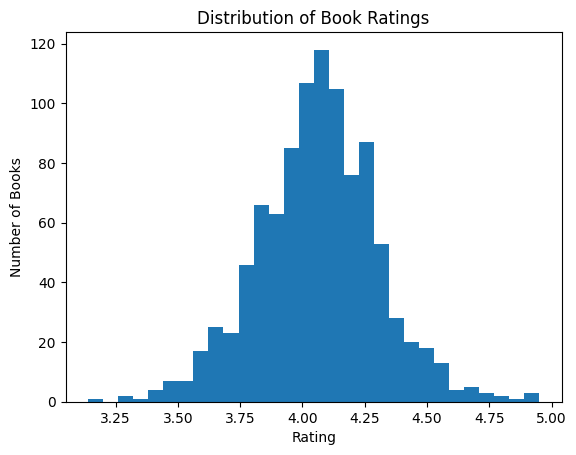

In [46]:
#Ratings distribution
plt.hist(df['rating_average'], bins=30)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Books")
plt.show()

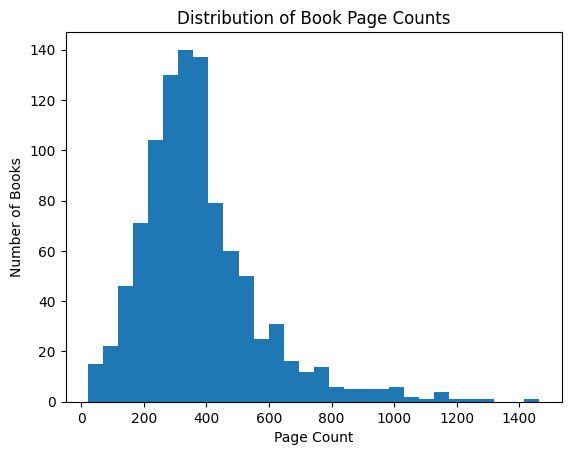

In [47]:
#Page count distribution
plt.hist(df['pageCount'], bins=30)
plt.title("Distribution of Book Page Counts")
plt.xlabel("Page Count")
plt.ylabel("Number of Books")
plt.show()


# Genre Analysis

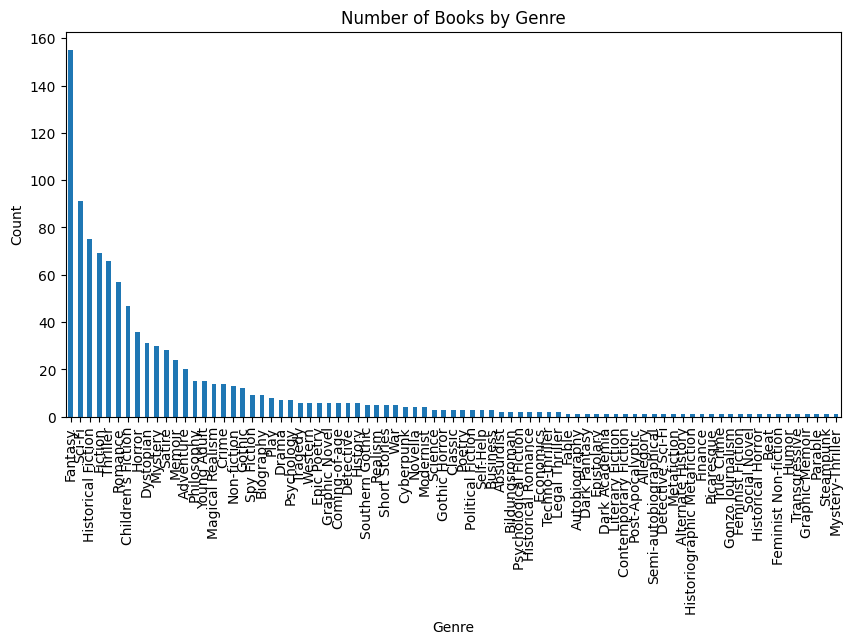

In [54]:
#Books by genre
genre_count = df['genre'].value_counts()

genre_count.plot(kind='bar', figsize=(10,5))
plt.title("Number of Books by Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

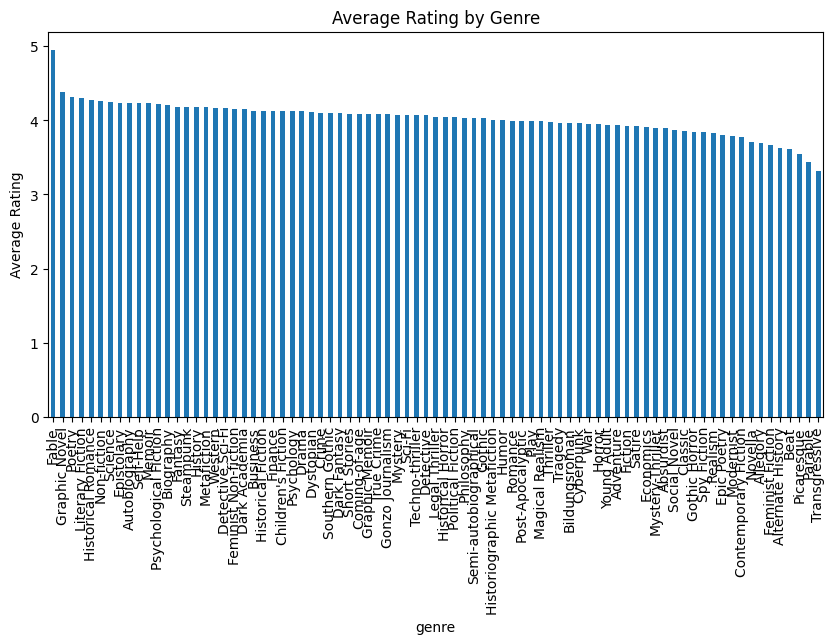

In [53]:
#Average rating by genre
genre_rating = df.groupby('genre')['rating_average'].mean().sort_values(ascending=False)

genre_rating.plot(kind='bar', figsize=(10,5))
plt.title("Average Rating by Genre")
plt.ylabel("Average Rating")
plt.show()

# Bestseller Analysis

In [59]:
#Bestseller percentage

val= df['bestseller_status'].value_counts(normalize=True) * 100
val.round(2)


,proportion
bestseller_status,
True,99.6
False,0.4


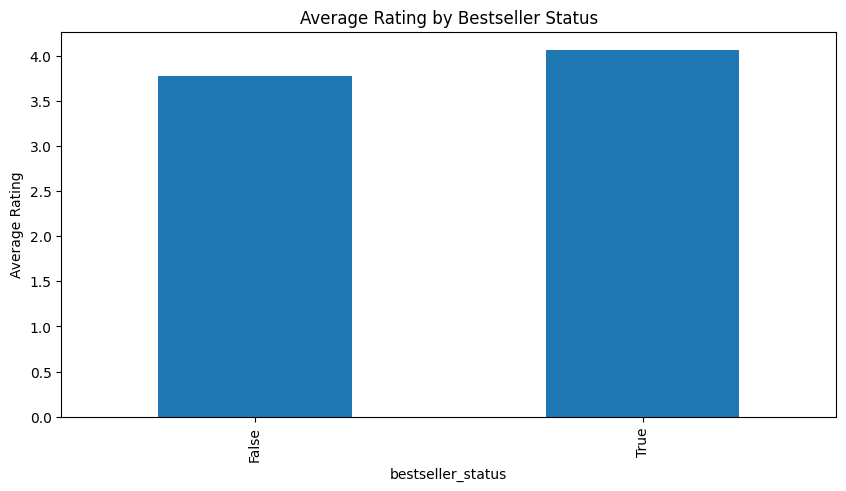

In [62]:
#Bestseller vs Non-bestseller
bestseller_rating = df.groupby('bestseller_status')['rating_average'].mean()

bestseller_rating.plot(kind='bar', figsize=(10,5))
plt.title("Average Rating by Bestseller Status")
plt.ylabel("Average Rating")
plt.show()



# Movie Adaptation Analysis

In [64]:
#Adaptation percentage
val=df['adapted_to_movie'].value_counts(normalize=True) * 100
val.round(2)


,proportion
adapted_to_movie,
True,65.05
False,34.95


In [65]:
#Genre vs adaptation
genre_adaptation = df.groupby('genre')['adapted_to_movie'].value_counts(normalize=True) * 100
genre_adaptation



genre              adapted_to_movie
Absurdist          True                100.000000
Adventure          True                 95.000000
                   False                 5.000000
Allegory           True                100.000000
Alternate History  True                100.000000
                                          ...    
War                False                20.000000
Western            True                 66.666667
                   False                33.333333
Young Adult        True                 80.000000
                   False                20.000000
Name: proportion, Length: 115, dtype: float64

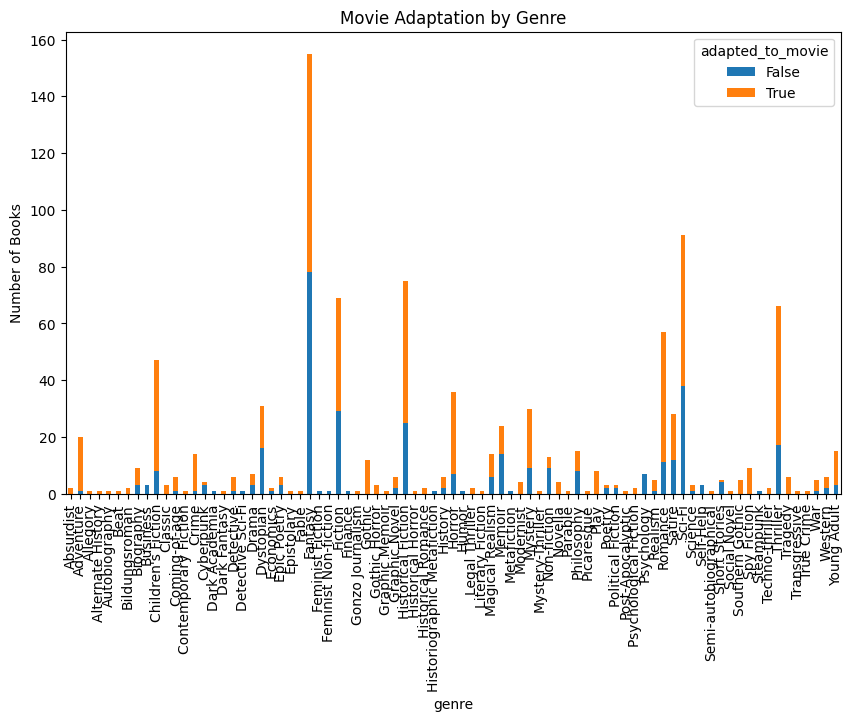

In [70]:
adapt_genre = pd.crosstab(df['genre'], df['adapted_to_movie'])

adapt_genre.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Movie Adaptation by Genre")
plt.ylabel("Number of Books")
plt.show()

# Awards Impact Analysis

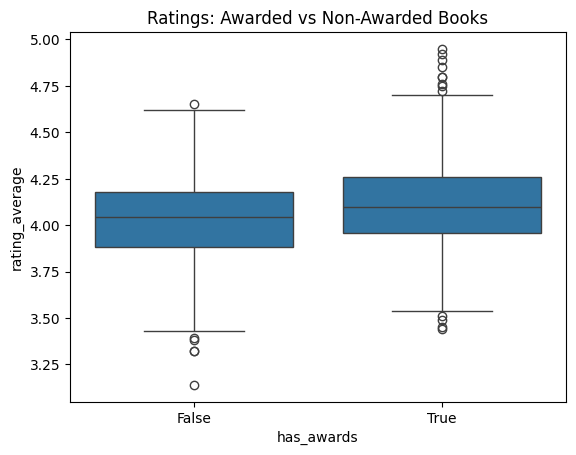

In [71]:
df['has_awards'] = df['awards'].notnull()

sns.boxplot(
    x='has_awards',
    y='rating_average',
    data=df
)
plt.title("Ratings: Awarded vs Non-Awarded Books")
plt.show()
#Award-winning books generally receive higher ratings.

# Time Trend Analysis

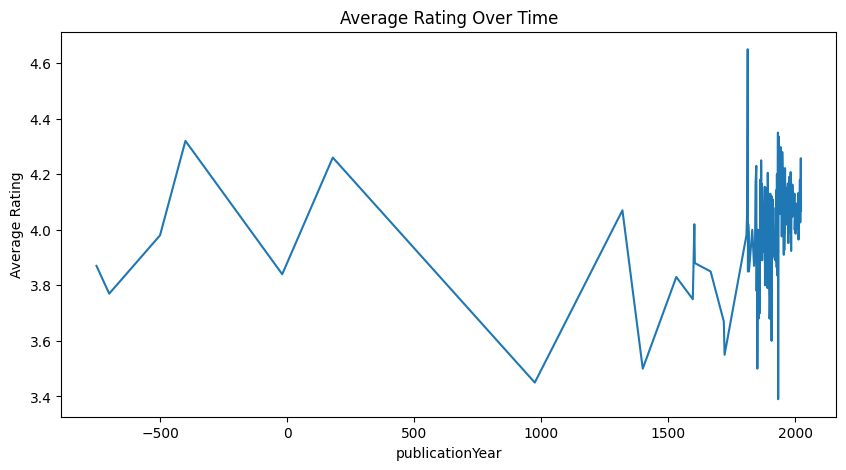

In [76]:
#Rating trend over time
rating_trend = df.groupby('publicationYear')['rating_average'].mean()

rating_trend.plot(figsize=(10,5))
plt.title("Average Rating Over Time")
plt.ylabel("Average Rating")
plt.show()

# Correlation Analysis

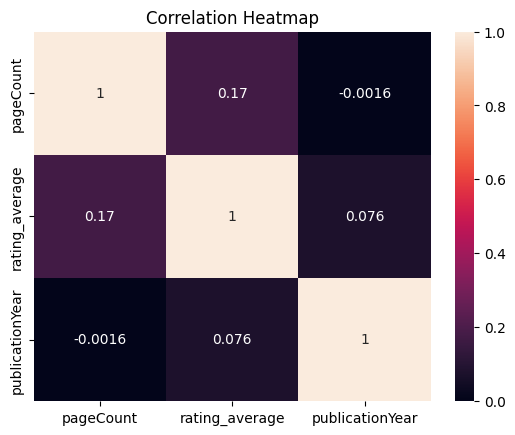

In [77]:
corr = df[['pageCount', 'rating_average', 'publicationYear']].corr()

sns.heatmap(corr, annot=True)
plt.title("Correlation Heatmap")
plt.show()